<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [43]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.4)]
Train_Y = Data_Y[:int(len(Data_Y)*0.4)]
Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(Data_X.shape)
print(Train_X.shape)
print(Vald_X.shape)
print(Test_X.shape)

print(Data_Y.shape)
print(Train_Y.shape)
print(Vald_Y.shape)
print(Test_Y.shape)
 
print(Data_X.shape)
print(Data_Y.shape)

(22950, 5, 5000, 1)
(9180, 5, 5000, 1)
(6884, 5, 5000, 1)
(6886, 5, 5000, 1)
(22950, 9)
(9180, 9)
(6884, 9)
(6886, 9)
(22950, 5, 5000, 1)
(22950, 9)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 4, 4991, 10)       210       
_________________________________________________________________
average_pooling2d_26 (Averag (None, 4, 1247, 10)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 3, 1238, 50)       10050     
_________________________________________________________________
average_pooling2d_27 (Averag (None, 3, 309, 50)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 2, 300, 50)        50050     
_________________________________________________________________
average_pooling2d_28 (Averag (None, 2, 75, 50)         0     

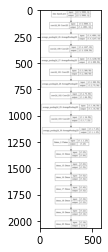

In [37]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 10, kernel_size = (2, 10),strides=(1, 1), activation = "relu") (inputs)
x = layers.AveragePooling2D(pool_size = (1,4)) (x)
x = layers.Conv2D(filters = 50, kernel_size = (2,10),strides = (1, 1),padding = 'valid', activation='relu') (x)
x = layers.AveragePooling2D(pool_size = (1,4)) (x)
x = layers.Conv2D(filters = 50,kernel_size= (2, 10),strides = (1, 1), activation="relu")(x)
x = layers.AveragePooling2D(pool_size = (1,4))(x)
x = layers.Conv2D(filters = 50,kernel_size= (2, 10),strides = (1, 1), activation="relu")(x)
x = layers.AveragePooling2D(pool_size = (1,4))(x)
x = layers.Conv2D(filters = 25,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
x = layers.AveragePooling2D(pool_size = (1,6))(x)
x = layers.Flatten()(x)
#x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (x)
#block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
#x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
#block_2_output = layers.add([x, block_1_output])
 

#x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
#block_3_output = layers.add([x, block_2_output])


#x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)

#block_6_output = layers.add([x, block_3_output])
 
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
#block_7_output = layers.add([x, block_6_output])

#x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 




x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.Dense(42, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(22, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [38]:
history = model.fit(Train_X, Train_Y, epochs=200,batch_size = 200, verbose=2, validation_data=(Vald_X,Vald_Y))

Epoch 1/200
46/46 - 4s - loss: 1.5025 - accuracy: 0.3897 - val_loss: 0.7199 - val_accuracy: 0.5460
Epoch 2/200
46/46 - 3s - loss: 0.5913 - accuracy: 0.6847 - val_loss: 0.5185 - val_accuracy: 0.6845
Epoch 3/200
46/46 - 3s - loss: 0.4735 - accuracy: 0.7272 - val_loss: 0.5264 - val_accuracy: 0.6646
Epoch 4/200
46/46 - 3s - loss: 0.4604 - accuracy: 0.7356 - val_loss: 0.4870 - val_accuracy: 0.7395
Epoch 5/200
46/46 - 3s - loss: 0.4500 - accuracy: 0.7485 - val_loss: 0.4457 - val_accuracy: 0.7308
Epoch 6/200
46/46 - 3s - loss: 0.4248 - accuracy: 0.7663 - val_loss: 0.4265 - val_accuracy: 0.7586
Epoch 7/200
46/46 - 3s - loss: 0.3865 - accuracy: 0.7949 - val_loss: 0.3731 - val_accuracy: 0.7865
Epoch 8/200
46/46 - 3s - loss: 0.3663 - accuracy: 0.8057 - val_loss: 0.3295 - val_accuracy: 0.8277
Epoch 9/200
46/46 - 3s - loss: 0.3614 - accuracy: 0.8105 - val_loss: 0.3705 - val_accuracy: 0.7850
Epoch 10/200
46/46 - 3s - loss: 0.3579 - accuracy: 0.8087 - val_loss: 0.3538 - val_accuracy: 0.8026
Epoch 11/

In [45]:
#Test_X,Test_Y = prepare_test_data()

Test_Y_1 = to_categorical(Test_Y)
print(Test_X.shape)
print(Test_Y.shape)
print(to_categorical(Test_Y).shape)
print(Train_Y.shape)
print(to_categorical(Train_Y).shape)

(6886, 5, 5000, 1)
(6886, 9)
(6886, 9, 2)
(9180, 9)
(9180, 9, 2)


In [46]:
from numpy import argmax
from numpy import random
print ('Training ',model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
print ('Testing ', model.metrics_names,' = ',model.evaluate(Test_X, Test_Y, verbose=0))
print (model.predict(Test_X))
print (Test_Y.astype('int'))
print ('true     ',Train_Y.astype('int'))    
print ('predicted', model.predict(Train_X))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
print (model.summary())
 
 
#numpy.savetxt('/content/gdrive/My Drive/Colab Notebooks/test_data/fileO.csv',model.predict(Test_X),delimiter=',')

Training  ['loss', 'accuracy']  =  [0.08363087475299835, 0.94466233253479]
Testing  ['loss', 'accuracy']  =  [0.0841829776763916, 0.9442346692085266]
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.4585111e-08 1.6759518e-08 4.7053794e-13 ... 1.5061142e-13
  6.1252210e-03 9.5337479e-12]
 [6.4108170e-11 1.1519601e-10 5.3141116e-16 ... 1.0749547e-16
  2.3298797e-03 6.1796935e-14]
 ...
 [4.2201087e-13 1.7750760e-06 3.4092020e-09 ... 9.9840146e-01
  1.2891692e-06 1.5946833e-03]
 [9.9997401e-01 2.3888664e-09 3.7478436e-12 ... 2.2651525e-09
  3.0362926e-06 7.8082471e-11]
 [7.6202686e-29 6.2087000e-13 1.7840712e-10 ... 1.3411018e-07
  5.7336295e-16 9.9999988e-01]]
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
true      [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
predicted [[1.0429811e-09 3.0147337e

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


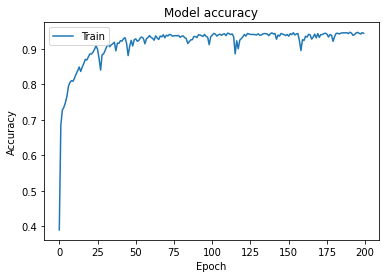

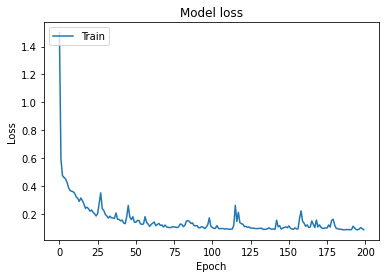

In [47]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#print (model.predict_classes(Test_X[:1,]))
#model.save('my_model.h5')
#Test_X[0]